In [17]:
import pandas as pd
import numpy as np

In [18]:
names = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols',
         'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue',
         'OD280/OD315 of diluted wines','Proline']

data = pd.read_csv('wine.csv',header = None, names = names)

df = data[['Alcohol','OD280/OD315 of diluted wines']]

df.head()

,Alcohol,OD280/OD315 of diluted wines
1,14.23,3.92
1,13.20,3.40
1,13.16,3.17
1,14.37,3.45
1,13.24,2.93


In [19]:
df = df[df.index!=1] #只考慮類別為0或1的資料
df.head()

,Alcohol,OD280/OD315 of diluted wines
2,12.37,1.82
2,12.33,1.67
2,12.64,1.59
2,13.67,2.46
2,12.37,2.87


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,:2].values
y = df.index.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 1,stratify=y)
#stratify依照原數據y(class)的比例分配給train和test

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'entropy',
                                n_estimators = 25,
                                random_state = 1)

forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [22]:
forest_pred = forest.predict(X_test)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=1, #單層決策樹
                              random_state=1) 

tree.fit(X_train,y_train)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, #用500棵決策樹單層決策樹
                         learning_rate=0.1,
                         random_state=1)

ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=1,
                             

In [24]:
tree_pred = tree.predict(X_test)
ada_pred = ada.predict(X_test)

In [25]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.xlim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha=0.8,
                    c=colors[idx],
                    label=cl,
                    edgecolor='black')
    
    if test_idx:
        X_test,y_test = X[test_idx,:], y[test_idx]
        
        plt.scatter(X_test[:,0],
                    X_test[:,1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

In [26]:
X_new = np.vstack((X_train, X_test))
y_new = np.hstack((y_train, y_test))

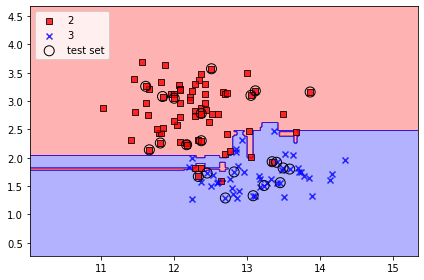

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
plot_decision_regions(X_new,y_new,classifier=forest,test_idx=range(96,119))
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [28]:
X_new

array([[12.2 ,  1.83],
       [12.33,  2.31],
       [12.79,  1.47],
       [12.84,  2.15],
       [11.56,  3.69],
       [12.07,  3.28],
       [12.88,  1.42],
       [13.11,  1.33],
       [11.96,  3.13],
       [12.16,  2.26],
       [12.37,  2.87],
       [12.67,  3.16],
       [12.37,  1.82],
       [12.08,  3.21],
       [12.37,  2.77],
       [13.03,  2.48],
       [11.87,  3.64],
       [12.08,  3.19],
       [12.69,  2.06],
       [12.87,  1.86],
       [11.41,  2.31],
       [12.08,  2.72],
       [12.04,  2.57],
       [12.42,  3.12],
       [12.77,  1.63],
       [12.21,  3.07],
       [12.93,  2.31],
       [12.72,  2.42],
       [12.7 ,  3.13],
       [13.49,  2.78],
       [12.29,  2.83],
       [12.51,  1.51],
       [12.42,  2.96],
       [12.72,  3.14],
       [13.16,  1.68],
       [13.71,  1.74],
       [13.4 ,  1.56],
       [14.13,  1.6 ],
       [12.08,  2.27],
       [13.62,  2.05],
       [13.27,  1.56],
       [12.08,  2.96],
       [12.22,  3.02],
       [14.

In [29]:
#定義決策區間
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    #setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1,X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1,X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
        
    #highlight test samples
    if test_idx:
        #plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')